Resumo do exercício:

- plotar os perfis de cada mês em uma única figura para temperatura e salinidade
- customizar o gráfico

In [1]:
# primeiro importamos os pacotes que iremos usar neste script
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
# magic-word para visualizar as imagens no notebook
%matplotlib inline

# ---- definindo funções que nos ajudarão ---- #
def carregar_climatologia(fname):
    """ 
    Função para ler um arquivo csv com o numpy.loadtxt e retornar a matriz para o código principal 
    
    parameters
    ----------
    fname: str
        Nome do arquivo a ser lido.
        
    returns
    ----------
    climatologia : np.ndarray
    """
    
    climatologia = np.loadtxt(fname, delimiter=',')
    
    return climatologia

In [2]:
# ---- começo do código principal ---- #

# carregando as matrizes de temperatura e salinidade
temperatura = carregar_climatologia('../dados/temperatura_woa2018_ubatuba_60m.csv')
salinidade  = carregar_climatologia('../dados/salinidade_woa2018_ubatuba_60m.csv')

# extraindo a matriz (1D) de profundidades
profundidade = temperatura[:,0]
profundidade

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55.])

In [3]:
# ---- determinando algumas configurações padrões da nossa figura ---- #

# criando uma lista de cores, com variações de cinza, no padrão RGB (red,green,blue)
colors = [(i/2., i/2., i/2.) for i in np.arange(0.,2., 0.18)]

# criando uma lista dos nomes dos meses para gerar legenda
labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

colors

[(0.0, 0.0, 0.0),
 (0.09, 0.09, 0.09),
 (0.18, 0.18, 0.18),
 (0.27, 0.27, 0.27),
 (0.36, 0.36, 0.36),
 (0.44999999999999996, 0.44999999999999996, 0.44999999999999996),
 (0.54, 0.54, 0.54),
 (0.63, 0.63, 0.63),
 (0.72, 0.72, 0.72),
 (0.8099999999999999, 0.8099999999999999, 0.8099999999999999),
 (0.8999999999999999, 0.8999999999999999, 0.8999999999999999),
 (0.99, 0.99, 0.99)]

/home/danilo/miniconda3/envs/doc_env/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error two minor releases later


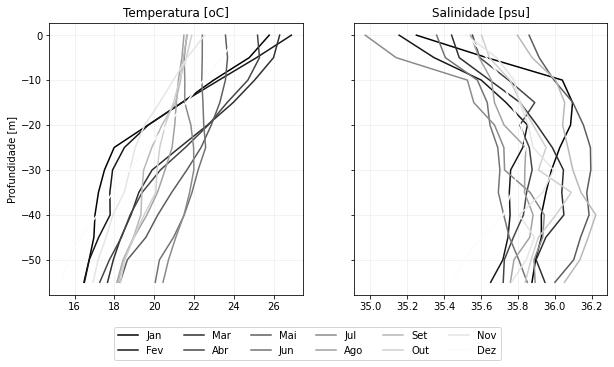

In [4]:
# ---- criando a visualização de dados que queremos ---- #
fig,axes = plt.subplots(ncols=2, sharey=True, figsize=(10,10))

# loop no número dos meses. Começamos em 1 pois o 0 é a profundidade na nossa matriz
for mes in np.arange(1,13,1):
    # extraindo cor e nome do mês
    col = colors[mes-1]
    nome_mes = labels[mes-1]
    
    # extraindo propriedades hidrográficas
    T,S = temperatura[:, mes], salinidade[:, mes]
    
    # plotando nos subplots
    axes[0].plot(T, -profundidade, c=col, label=nome_mes)
    axes[1].plot(S, -profundidade, c=col, label=nome_mes)

# adicionando titulos para cada subplot
axes[0].set_title('Temperatura [oC]')
axes[1].set_title('Salinidade [psu]')
axes[0].set_ylabel('Profundidade [m]')

# eixo x no topo
_ = [ax.xaxis.tick_top() for ax in axes]

# adicionando gradeamento
_ = [ax.grid('--', alpha=.2) for ax in axes]
# adicionando legenda
plt.legend(ncol=6, bbox_to_anchor=(.6, -.1))
plt.savefig('lec03_exercicion3.png', bbox_to_inches='tight')

# Aula 4 - Precisamos falar sobre pandas

![image.png](../figures/pandas_computer.gif)

**material de apoio**:

- Livro online com exemplos e descrições sobre numpy, matplotlib e pandas: [[link]](https://jakevdp.github.io/PythonDataScienceHandbook/)
- Lemenkova, P. (2019). Processing oceanographic data by Python libraries NumPy, SciPy and Pandas. [[link]](https://hal.archives-ouvertes.fr/hal-02093491/document)
- Lista de pacotes aplicados à oceanografia (olhem com cautela, tem muita coisa): [[link]](https://medium.com/@hafezahmad/some-essential-python-applications-in-the-oceanographic-data-analysis-and-visualization-569d6af25fd4)
- Guia do usuário de Pandas: [[link]](https://pandas.pydata.org/pandas-docs/stable/user_guide)

- Thermodynamics Equation of Seawater - 2010: [[link]](http://www.teos-10.org/software.htm)

**O que é o pandas?**

Pandas é um pacote (praticamente um framework) para análise e manipulação de dados. É construído sobre os ombros do numpy e matplotlib, 

- pacote para analisar dados tabulares
- muito utilizado para análise de séries temporais
- ciência de dados, aprendizado de máquina? Tem pandas!
- na oceanografia também! 

#### O que são dados tabulares?

- dados estruturados
- colunas representam variáveis
- linhas são informações destas variáveis (observações/medições)
- compartilham o mesmo índice
- formatos:

![](https://pandas.pydata.org/docs/_images/02_io_readwrite.svg)
Fonte: [Getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) do Pandas

#### Conceitos importantes para utilizar o pandas

No Pandas temos dois tipos de estrutura de dados novos que são imensamente utilizados:

- Series: espécie de matriz 1D com uma informação, porém com um índice definido
    - ex: um perfil vertical indexando a temperatura a uma profundidade
    
- DataFrame: coleção de Series que compartilham o mesmo índice
    - ex: um conjunto de perfis verticais que compartilham o mesmo índice: a profundidade
    
- Eixos (axis):
    - axis=0 - linhas (rows)
    - axis=1 - colunas (cols)
    
![image.png](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)
Fonte: [Getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) do Pandas

### Vamos ver algumas funcionalidade básicas
Durante a criação destas estruturas, precisamos informar ao pandas os dados que desejamos. 

Em ambos os casos podemos utilizar os argumentos:

- ```data``` para indicar os dados que serão armazenados na estrutura e 
- ```index``` para apontar o indexamento que eles terão.

**nota**: comumemente atribui-se um Dataframe à uma variável chamada ```df```, porém pode ser qualquer nome que respeite as regras de variáveis.

In [7]:
# padrão de importação
import pandas as pd

# criando um pd.Series
sr = pd.Series(data=np.random.randn(5), index=np.arange(0,5))

# criando um pd.DataFrame: notem o F maiúsculo
df = pd.DataFrame(data={'serie1': sr, 'serie2': np.random.randn(5)}, index=sr.index)

sr

No entanto, é comum utilizar dicionários para criar DataFrame, pois podemos indicar também qual o nome de cada coluna (cabeçalho, header), ao passo que em Series não temos esta possibilidade:

In [134]:
pd.Series(data={'coluna1': np.random.randn(10)}, index=np.arange(10))

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
dtype: object

In [9]:
pd.DataFrame(data={'coluna1': np.random.randn(10)}, index=np.arange(10))

,coluna1
0,0.202356
1,-3.237976
2,0.427543
3,1.499204
4,-1.890353
5,-1.959997
6,1.945200
7,0.535547
8,-0.240185
9,2.076932


Observe a diferença entre os dois tipos acima e veja como o segundo fica mais organizado e legível.

#### Leitura de arquivos (csv, xlsx)

Até agora, utilizamos exemplos no pandas criados de forma aleatória. Vamos começar a explorar o potencial deste pacote utilizando dados reais meteo-oceanográficos!

Para isso, vamos utilizar o arquivo ```.csv``` disponibilizado pelo [PNBOIA]().

In [ ]:
# se estiver no google colab, rode:
!wget --directory-prefix=../dados/ https://raw.githubusercontent.com/nilodna/python-basico/feature_iojr-shortcourse/dados/pnboia_vitoria.csv

In [10]:
# leitura do arquivo
df = pd.read_csv('../dados/pnboia_vitoria.csv')

# descrição em termos estatísticos
df.describe()

/home/danilo/miniconda3/envs/doc_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (35,38,41,44,47,50) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,# Epoca,Year,Month,Day,Hour,Minute,Wspdflag,Wspdflagid,Wdir,Wdirflag,...,Cdir3flagid,Wvhtflag,Wvhtflagid,Wmaxflag,Wmaxflagid,Dpdflag,Dpdflagid,Mwd,Mwdflag,Mwdflagid
count,1.450300e+04,14503.000000,14503.000000,14503.000000,14503.000000,14503.0,14503.000000,14503.000000,14503.000000,14503.000000,...,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000
mean,1.471006e+09,2016.131904,6.299111,15.715507,11.584500,21.0,0.001931,0.000207,128.362201,0.001931,...,0.502241,0.091291,0.024753,0.091291,0.023650,0.091291,0.023168,-120.026133,0.091291,0.022271
std,1.531814e+07,0.613970,3.680174,8.786352,6.957216,0.0,0.087860,0.018567,137.617630,0.087860,...,0.500564,0.597375,0.201380,0.597375,0.183983,0.597375,0.167365,1487.246461,0.597375,0.148036
min,1.444756e+09,2015.000000,1.000000,1.000000,0.000000,21.0,0.000000,0.000000,-9999.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,0.000000,0.000000
25%,1.457807e+09,2016.000000,3.000000,8.000000,6.000000,21.0,0.000000,0.000000,35.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000
50%,1.470859e+09,2016.000000,6.000000,16.000000,11.000000,21.0,0.000000,0.000000,87.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,0.000000
75%,1.483911e+09,2017.000000,10.000000,23.000000,18.000000,21.0,0.000000,0.000000,214.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.000000,0.000000,0.000000
max,1.500156e+09,2017.000000,12.000000,31.000000,23.000000,21.0,4.000000,2.000000,381.000000,4.000000,...,2.000000,4.000000,8.000000,4.000000,9.000000,4.000000,9.000000,369.000000,4.000000,2.000000


In [11]:
# informações em termos computacionais: tipo das colunas, nomes, quantidade de linhas, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14503 entries, 0 to 14502
Data columns (total 66 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   # Epoca      14503 non-null  int64 
 1   Lat          14503 non-null  object
 2   Lon          14503 non-null  object
 3   Year         14503 non-null  int64 
 4   Month        14503 non-null  int64 
 5   Day          14503 non-null  int64 
 6   Hour         14503 non-null  int64 
 7   Minute       14503 non-null  int64 
 8   Battery      14503 non-null  object
 9   bHead        14503 non-null  object
 10  Wspd         14503 non-null  object
 11  Wspdflag     14503 non-null  int64 
 12  Wspdflagid   14503 non-null  int64 
 13  Wdir         14503 non-null  int64 
 14  Wdirflag     14503 non-null  int64 
 15  Wdirflagid   14503 non-null  int64 
 16  Gust         14503 non-null  object
 17  Gustflag     14503 non-null  int64 
 18  Gustflagid   14503 non-null  int64 
 19  Atmp         14503 non-nu

Muitos dados neste arquivos e não necessariamente serão todos utilizados em um script. Podemos, portanto, filtrar estas informações já durante a leitura. 

Claro que para fazer isso é necessária explorarmos o conjunto de dados, checar os metadados, etc. Como já fiz isso antes, vamo direto ao ponto.

## Algumas opções disponíveis para leitura de arquivos

**Pular linhas**

Para pular uma quantidade específica de linhas, se necessário, utiliza-se o argumento ```skiprows```. 

**Indicando separador**

Ao usar o método ```.read_csv()```, por padrão, o arquivo será dividido a cada ```;```. Caso queiramos alterar este padrão, usamos o argumento ```sep``` com o caracter desejado.

**Nomeando colunas**

Por padrão, o pandas irá utilizar a primeira linha disponível no arquivo (ou logo após a quantidade de linhas puladas) como header, ou seja, para nomear as colunas. Para omitir esse padrão, muitas vezes necessário pois o arquivo não tem cabeçalho, usamos o argumento ```header=None```. Ainda com este argumento podemos especificar, caso queira, uma linha específica para ser cabeçalho.
Se por outro lado, desejarmos nomear manualmente as colunas, podemos passar uma lista de nomes com o argumento ```names```. Porém, o tamanho desta lista deve ser coerente com a quantidade de colunas utilizadas.

Importante: os nomes não podem ser duplicados

**Selecionando colunas**

No caso do arquivo acima,temos diversas variáveis, mas não precisamos de todas. Podemos selecionar quais colunas devem ser lidas, passando o argumento ```usecols``` com uma lista de índices (números inteiros neste caso) das colunas. Um exemplo seria:

```python
df = pd.read_csv('../dados/pnboia_vitoria.csv', usecols=[0,1,2])
```

onde leríamos somente as colunas Epoca, Lat e Lon do arquivo.

**Lidando com índices**

Da mesma forma que as colunas, podemos indicar na leitura do arquivo qual coluna desejamos que seja índice com o argumento ```index_col```. Caso contrário e por padrão, o pandas gera uma lista ordenada crescente de números de 1 a n, sendo n o o número de linhas no arquivo.

**Caracteres com acentuação** 

Normalmente o pandas não irá ler ou lerá incorretamente caracteres com acentuaçao. Para resolver isso, usa-se o argumento ```encoding``` durante a leitura. Os mais usados para resolver problemas no pt-br são as opções: ```'utf8'```, que é o padrão, ou ```'latin1'``` para ```ç à é î ã```.

Exemplo de aplicação de alguma das opções citada:

```python
df = pd.read_csv('nome_arquivo.csv', skiprows=17, index_col=0)
```

Nos exemplos abaixo veremos alguns argumentos em ação, bem como outros métodos do pandas.

In [33]:
df = pd.read_csv('../dados/pnboia_vitoria.csv', 
                 usecols=[0,1,2, 8], index_col=0, 
                 decimal=',',
                 dtype=float)

# o método .head() exibe as primeiras 5 linhas do dataframe
df.head()

,Lat,Lon,Battery
# Epoca,,,
1.444756e+09,-19.935850,-39.704233,-9999.0
1.444759e+09,-19.935883,-39.704183,-9999.0
1.444763e+09,-19.936000,-39.704100,-9999.0
1.444766e+09,-19.936133,-39.703967,-9999.0
1.444770e+09,-19.936117,-39.703933,-9999.0


In [31]:
# da mesma forma, o método exibe as últimas 5 linhas:
df.tail()

,Lat,Lon
# Epoca,,
1500138000,"-19,935","-39,708"
1500141600,"-19,933","-39,708"
1500148800,"-19,936","-39,705"
1500152400,"-19,934","-39,704"
1500156000,"-19,938","-39,704"


Notem que no exemplo acima forcei para todos as colunas serem do tipo float. Isso deu certo porquê sei que as três colunas são float de fato. Caso tenhamos colunas com tipos de variáveis diferentes, precisamos enviar um dicionário onde as chaves serão os nomes das colunas e o valor o tipo da variável:

```python
   df = pd.read_csv(..., dtype={'coluna1_str': str, 'coluna2_int': int, 'coluna3_float': float})
```

Porém, em muitos arquivos, os valores inválidos podem vir com outra informação (e.g. -9999). Nestes casos, os comando acima - para remover NaN -, não funcionarão, pois não temos de fato um NaN propriamente dito. Para contornar este problem, usamos outro método do pandas, chamado ```.replace()```, que substituirá algum valor que fornecemos por outro valor, que também fornecermos:

```python
    df = df.replace(-9999, np.nan)
```

Note que usamos o numpy neste caso para especificar um NaN (not a number). Este método é uma forma que o python tem para preenchermos algum dado inválido com um valor que não será contabilizado durante nossas estatísticas. Apesar de parecer uma string, no entanto, ```np.nan``` nos fornece um float.

Veja:

In [34]:
df = df.replace(-9999, np.nan)
df.head()

,Lat,Lon,Battery
# Epoca,,,
1.444756e+09,-19.935850,-39.704233,NaN
1.444759e+09,-19.935883,-39.704183,NaN
1.444763e+09,-19.936000,-39.704100,NaN
1.444766e+09,-19.936133,-39.703967,NaN
1.444770e+09,-19.936117,-39.703933,NaN


In [36]:
print(np.nan)
type(np.nan)

nan


float

### Removendo dados

```.drop()```

Remove dados especificados pela seu índice e sua coluna.

```.dropna()```

Remove valores faltantes (not-a-number). Possui alguns argumentos importantes, como ```how``` que especifica se as linhas ou colunas serão removidas: se **'any'** remove qualquer linha/coluna que tenha nan e se **'all'** remove somente se todos os valores forem nan.

Para designa qual eixo do dataframe devemos operar o método, usa-se o argumento ```axis```. Isso na verdade acontece para diversos métodos do pandas.

```.fillna()```

Simples substitui valores inválidos, usando o último ou o próximo valor válido da sequência. Note que isso não se trata de uma interpolação, apenas uma substituição. Métodos de interpolação serão vistos no próximo encontro.

In [46]:
df.drop(['Battery'], axis=1).head()

,Lat,Lon
# Epoca,,
1.444756e+09,-19.935850,-39.704233
1.444759e+09,-19.935883,-39.704183
1.444763e+09,-19.936000,-39.704100
1.444766e+09,-19.936133,-39.703967
1.444770e+09,-19.936117,-39.703933


In [47]:
df.dropna()

,Lat,Lon,Battery
# Epoca,,,
1.465906e+09,-19.933200,-39.701700,13.45
1.465909e+09,-19.933250,-39.701550,13.71
1.465913e+09,-19.933250,-39.701517,13.74
1.465916e+09,-19.933133,-39.701650,13.36
1.465920e+09,-19.933067,-39.701767,13.35
...,...,...,...
1.500062e+09,-19.934000,-39.704000,13.00
1.500066e+09,-19.935000,-39.703000,12.80
1.500138e+09,-19.935000,-39.708000,13.30


In [49]:
df.fillna(method='backfill').tail()

,Lat,Lon,Battery
# Epoca,,,
1.500138e+09,-19.935,-39.708,13.3
1.500142e+09,-19.933,-39.708,13.3
1.500149e+09,-19.936,-39.705,12.8
1.500152e+09,-19.934,-39.704,12.8
1.500156e+09,-19.938,-39.704,12.8


In [51]:
df.fillna(method='pad').tail()

,Lat,Lon,Battery
# Epoca,,,
1.500138e+09,-19.935,-39.708,13.3
1.500142e+09,-19.933,-39.708,13.3
1.500149e+09,-19.936,-39.705,13.3
1.500152e+09,-19.934,-39.704,13.3
1.500156e+09,-19.938,-39.704,12.8


Observe a diferença nas duas células acima.

#### Retomando o conjunto de dados da semana passada

Vamos voltar ao conjunto de dados utilizado na aula anterior e vamos ler, o que antes era uma matriz do numpy, em um novo dataframe, indexado pela profundidade e com as colunas nomeadas com os nomeses dos meses:

In [40]:
# lista com meses
meses_siglas = ['z', 'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
# lendo arquivo
df_temp = pd.read_csv('../dados/temperatura_woa2018_ubatuba_60m.csv', sep=',',
                      header=None, index_col=None, names=meses_siglas)

df_temp

,z,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,0.0,25.780909,26.898490,26.306210,25.193900,23.58231,22.418090,21.63910,21.495000,21.659710,21.88560,22.535710,24.151209
1,5.0,24.777710,25.145191,25.997910,25.292210,23.68611,22.415500,21.50831,21.392090,21.464290,21.61869,21.656391,23.421900
2,10.0,22.989990,23.257100,25.047810,24.708990,23.58030,22.391190,21.53759,21.214610,21.325610,21.27759,20.960810,22.481491
3,15.0,21.399410,21.395710,23.969300,23.665290,23.29881,22.450400,21.53441,21.115290,21.065810,20.96969,20.271790,21.607891
4,20.0,19.691910,19.703000,22.677690,22.719390,22.86900,22.490600,21.84231,21.031391,20.387510,20.55181,19.522709,20.653690
5,25.0,17.986710,18.501810,21.276290,21.566410,22.35550,22.586910,21.98050,20.898290,19.880000,20.27740,19.043991,19.682690
6,30.0,17.498909,17.907010,19.894491,20.312510,21.64240,22.208090,21.99181,20.545200,19.469810,20.14820,18.770390,18.762810
7,35.0,17.197691,17.770500,19.225590,19.396000,20.87930,21.899710,21.77969,20.165010,19.378590,20.07990,18.488600,17.920109
8,40.0,17.022590,17.784191,18.834300,18.789710,20.17989,21.508709,21.49789,19.630410,19.328290,19.49021,17.923090,17.141209
9,45.0,16.967190,17.208391,18.328990,18.354210,19.58121,20.970110,21.08669,18.984690,18.953190,18.97859,17.580809,16.284891


### Seleção de dados por rótulo e por posição

Uma vez que temos um dataframe montado, podemos começar o trabalho de explorar este conteúdo ou, se for o caso, de limpar o dataframe para remover valores espúrios ou informações que não condizem com a coluna.

Para isso, podemos utilizar dois métodos: ```.loc[]``` e ```.iloc[]```.

Vejamos o que o primeiro faz:

In [42]:
# o primeiro item deve ser a linha (neste caso todas)
# o segundo deve ser o nome das colunas
df_temp.loc[:, ['Jan', 'Dez']]

,Jan,Dez
0.0,35.249710,35.525112
5.0,35.631490,35.630810
10.0,36.041090,35.715390
15.0,36.096400,35.760990
20.0,36.085390,35.814790
25.0,36.027313,35.843100
30.0,35.982310,35.803200
35.0,35.952390,35.763813
40.0,35.927100,35.721310
45.0,35.927288,35.602210


Enquanto que o segundo acessa as informações por indexamento simples, igual no numpy:

In [43]:
# ainda segue a mesma ordem: .iloc[nrow, ncol]
df_temp.iloc[0,1]

35.156113


Porém, para utilizar o método ```.loc[]``` precisamos conhecer o que são os "nomes" das linhas e o que são os nomes das colunas.

Fazemos isso com os métodos ```.columns``` e ```.index```:

In [44]:
df_temp.columns

Index(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out',
       'Nov', 'Dez'],
      dtype='object')

In [45]:
df_temp.index

Float64Index([0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0,
              55.0],
             dtype='float64')

### Visualização de dados

Como dito anteriormente, o pandas é construído com base em dois pacotes: o numpy e o matplotlib. Isso quer dizer que podemos utilizar grande parte dos métodos destes pacotes de maneira integrada aos nossos dataframes.

No caso de visualização de dados, podemos observar a facilidade que essa integração nos traz. 

Iremos, em seguida, replicar nosso perfil vertical utilizando o conjunto de dados extraído do WOA 2018.

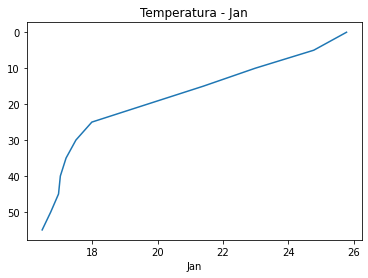

In [49]:
# plotando perfis verticais para Janeiro
df_temp.plot(x='Jan', y='z', 
             title='Temperatura - Jan',
             legend=False)
# infelizmente o pandas, ainda, não possui um argumento para inverter o eixo y
plt.gca().invert_yaxis()

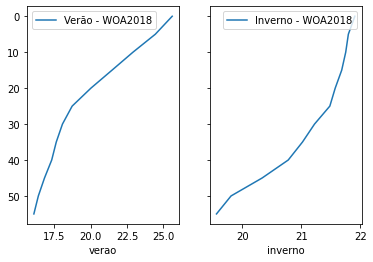

In [135]:
# plotando as médias de verão e inverno
meses_verao = ['Dez', 'Jan', 'Fev']
meses_inverno = ['Jun', 'Jul', 'Set']

df_temp['verao'] = df_temp[meses_verao].mean(axis=1)
df_temp['inverno'] = df_temp[meses_inverno].mean(axis=1)

fig,axes = plt.subplots(ncols=2, sharey=True)

df_temp.plot(x='verao', y='z', ax=axes[0], label='Verão - WOA2018')
df_temp.plot(x='inverno', y='z', ax=axes[1], label='Inverno - WOA2018')
plt.gca().invert_yaxis()

Pode parecer que o uso de pandas, em termos de visualização, não traz tanto benefícios assim. E isso em alguns pontos é de fato verdade e acabamos recorrendo para funções puramente em matplolib para gráficos. Entretanto, ele se apresenta como uma ótima alternativa durante estágios de análise exploratória dos conjuntos, mais ainda quando combinado com outros pacotes, como seaborn, para ṽisualizações estatísticas, por exemplo.


#### Combinando pandas e oceanografia

__disclaimer__: este trecho do material foi fortemente baseado (se não copiado) do trabalho feito pelo Prof Filipe Fernandes neste [link](https://github.com/ocefpaf/pyrantine/blob/master/notebooks/02-CTD/02-CTD-processing.ipynb).

No contexto de análise de dados hidrográficos, como salinidade e temperatura, dois pacotes estritamente oceanográficos são utilizados comumente: o ```GSW``` e o ```CTD``` (existem variações deste último).

O GSW é o framework em python da convenção TEOS-10 (Equações termodinâmicas da água do mar 2010 - Thermodynamics Equation of Seawater 2010). Com ela podemos calcular propriedades como salinidade prática, referência, absoluta, a partir das informações de condutividade obtidas pelo CTD, além de muitas outras propriedades (temperatura conservativa, densidade, frequência de Brunt-Vaisalla, etc).

O segundo pacote, CTD, é utilizado para leitura de arquivos gerados por perfis de ... CTD (seabird, por exemplo). Porém, ele ainda pode ser utilizado para arquivos de rosete, XBT, outros. Além de leitura, ele nos permite aplicar etapas de pré-processamento necessárias para se tratar perfis verticais brutos.

O pacote CTD amplifica, em termos de perfil vertical, os poderes do pandas, nos permitindo fazer alguma coisas que o pandas sozinho não conseguiria. Vejamos um exemplo:

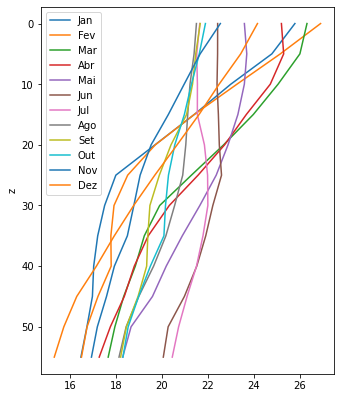

In [76]:
import ctd
df = pd.read_csv('../dados/temperatura_woa2018_ubatuba_60m.csv', sep=',',
                      header=None, index_col=None, names=meses_siglas)
df.set_index('z').plot_cast(legend=True)
plt.legend()

Com poucas linhas podemos plotar todos os perfis verticais, já indexados pela profundidade (que já está na orientação correta). Ganhamos muito com este método providenciado pelo pacote.

Porém, o pacote vai muito além de amplificar os poderes do pandas me termos de visualização. Ele nos permite realizar etapas de pré processamento de forma muito simples. 

Vamos ver algumas etapas:

In [ ]:
# execute a linha de comando abaixo para fazer download do conjunto de dados que serão utilizados
!wget --directory-prefix=../dados/ https://github.com/ocefpaf/pyrantine/raw/master/notebooks/02-CTD/CTD-data/CTD-spiked-unfiltered.cnv.bz2

In [78]:
# lendo um arquivo .cnv, formato vindo do CTD da marca Seabird
cast = ctd.from_cnv('../dados/CTD-spiked-unfiltered.cnv.bz2')

cast

,scan,timeS,t090C,t190C,c0S/m,c1S/m,sbeox0V,par,spar,ph,...,longitude,pumps,pla,sbeox0PS,sbeox0Mm/Kg,dz/dtM,accM,flSP,xmiss,flag
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
6.433,1.0,0.000,26.9647,26.9314,5.821803,5.800920,2.1099,1.000000e-12,0.0000,8.575,...,-37.22588,False,26.970,69.61016,137.397,0.000,0.00,0.16484,99.2996,False
6.448,2.0,0.042,26.9644,26.9307,5.821615,5.800819,2.1148,1.000000e-12,1.9601,8.580,...,-37.22588,False,26.969,69.82216,137.817,0.351,8.43,0.16484,99.3260,False
6.433,3.0,0.083,26.9642,26.9301,5.821421,5.800727,2.1209,1.000000e-12,0.0000,8.575,...,-37.22588,False,26.969,70.08688,138.341,-0.351,-16.87,0.16606,99.3260,False
6.448,4.0,0.125,26.9639,26.9296,5.821264,5.800727,2.1270,1.000000e-12,0.0000,8.575,...,-37.22588,False,26.969,70.35184,138.865,0.351,16.86,0.16606,99.3260,False
6.433,5.0,0.167,26.9640,26.9291,5.821219,5.800634,2.1331,1.000000e-12,0.0000,8.575,...,-37.22588,False,26.969,70.61657,139.388,-0.351,-16.86,0.16606,99.3525,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.879,71321.0,2971.667,26.9742,26.9758,5.845051,5.845769,2.5800,1.000000e-12,3.9202,8.570,...,-37.22778,True,26.979,90.01917,177.472,-1.054,-16.87,0.15873,97.2099,False
7.923,71322.0,2971.708,26.9745,26.9758,5.845036,5.845769,2.5800,1.000000e-12,1.9601,8.570,...,-37.22778,True,26.979,90.01966,177.473,1.055,50.61,0.15995,97.2099,False
7.937,71323.0,2971.750,26.9742,26.9759,5.845081,5.845769,2.5800,1.000000e-12,3.9202,8.570,...,-37.22778,True,26.979,90.01981,177.473,0.352,-16.87,0.15751,97.2628,False


Um CTD realiza a amostragem das propriedades tanto na descida (downcast) quando na subida (upcast). Quando vamos analisar seus dados, no entanto, tendemos a utilizar as informações no momento da descida.

No arquivo, entretanto, as informações ficam todas juntas, sendo necessário determinar o ponto de inflexão da amostragem. Isso poderia ser complicado, mas não é:

In [84]:
down,up = cast.split()
cast.shape, down.shape, up.shape

((71325, 30), (34632, 30), (36693, 30))

Contamos ainda com métodos para:

- remover registros fora da coluna d'água
- aplicar filtro passa-baixa para remoção de erros de alta frequência
- remoção de spikes fora do intervalo do intervalo estabelecido pelo desvio padrão
- remoção de registros com inversão de profundidade
- interpolação
- média em caixas (binagem)
- suavização ou alisamento

Podemos aplicar todos estes métodos, inclusive, em cadeia. Ou seja, um seguido do outro:

In [93]:
down_final = down.remove_above_water()\
            .lp_filter()\
            .despike(n1=2, n2=20, block=100)\
            .press_check()\
            .interpolate()\
            .bindata(delta=1)\
            .smooth(window_len=21, window="hanning")

down_final

,scan,timeS,t090C,t190C,c0S/m,c1S/m,sbeox0V,par,spar,ph,...,longitude,pumps,pla,sbeox0PS,sbeox0Mm/Kg,dz/dtM,accM,flSP,xmiss,flag
7.5,4572.670528,190.486269,26.974138,26.975597,5.845094,5.846064,2.576549,1.000000e-12,0.234759,8.580000,...,-37.225444,1.0,26.979018,89.862263,177.162189,0.803320,0.137719,0.177155,97.155540,0.0
8.5,4634.553275,193.064709,26.974698,26.976090,5.845201,5.846167,2.577343,1.000000e-12,0.304238,8.580000,...,-37.225432,1.0,26.979339,89.908545,177.251856,0.785147,0.880307,0.179292,97.453742,0.0
9.5,4695.732139,195.613821,26.975249,26.976574,5.845306,5.846268,2.578064,1.000000e-12,0.370249,8.580000,...,-37.225420,1.0,26.979651,89.951597,177.335180,0.769359,1.646066,0.181447,97.746573,0.0
10.5,4755.592501,198.107997,26.975775,26.977037,5.845408,5.846367,2.578649,1.000000e-12,0.433155,8.580000,...,-37.225409,1.0,26.979938,89.988596,177.406640,0.754504,2.341553,0.183725,98.024102,0.0
11.5,4813.635347,200.526444,26.976265,26.977470,5.845505,5.846461,2.579031,1.000000e-12,0.500165,8.580000,...,-37.225398,1.0,26.980190,90.016588,177.460450,0.739713,2.898081,0.186157,98.277968,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029.5,32958.568884,1373.232003,3.868543,3.873936,3.238823,3.239805,1.628201,1.000000e-12,2.104011,8.232903,...,-37.226362,1.0,3.792546,56.010849,177.684041,0.776896,-0.002818,0.100580,100.431989,0.0
1030.5,33075.791372,1378.116260,3.864256,3.869581,3.238531,3.239509,1.627444,1.000000e-12,2.130244,8.232401,...,-37.226363,1.0,3.788206,55.981071,177.607286,0.699154,-1.155717,0.100804,100.432193,0.0
1031.5,33209.767124,1383.698566,3.859281,3.864533,3.238184,3.239158,1.626576,1.000000e-12,2.157724,8.231821,...,-37.226364,1.0,3.783183,55.945829,177.516043,0.622918,-2.665558,0.101060,100.432338,0.0
1032.5,33357.086443,1389.836853,3.853762,3.858932,3.237795,3.238763,1.625622,1.000000e-12,2.186450,8.231178,...,-37.226365,1.0,3.777620,55.906329,177.413550,0.549086,-4.454873,0.101346,100.432425,0.0


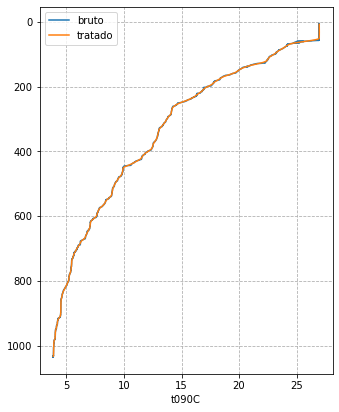

In [108]:
# comparando o perfil original e o processado
ax0 = down['t090C'].plot_cast(label='bruto')

ax1 = down_final['t090C'].plot_cast(ax=ax0, label='tratado')
ax1.grid(ls='--')
plt.legend()

Vamos aplicar um zoom no perfil vertical para observarmos com maiores detalhes o que há de mudanças no perfil:

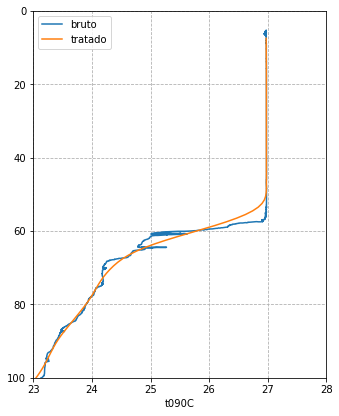

In [109]:
# comparando o perfil original e o processado
ax0 = down['t090C'].plot_cast(label='bruto')

ax1 = down_final['t090C'].plot_cast(ax=ax0, label='tratado')

# dando um zoom par verificarmos melhor as diferenças
ax1.set_xlim([23,28])
ax1.set_ylim([100,0])

ax1.grid(ls='--')
plt.legend()

O pacote CTD ainda nos permite acessar os metadados originais do arquivo CNV:

In [116]:
metadados = cast._metadata
metadados.keys()

dict_keys(['header', 'config', 'names', 'skiprows', 'time', 'lon', 'lat', 'name'])

Note que estamos extraindo do arquivo original, isso porquê  infelizmente o método ```._metadata``` não persiste quando modificamos o dataframe original. Como podemos observar no caso do dataframe correspondente ao dados de downcast:

In [113]:
down._metadata

[]

#### Propriedade hidrográficas derivadas

Uma vez que temos nosso perfil vertical devidamente filtrado e pré tratado, podemos começar a calcular propriedades hidrográficas derivadas destas informações, como:

- Salinidade Absoluta
- Salinidade Prática
- Temperatura Conservativa
- Densidade
- Outras

In [119]:
### para facilitar:

# extraindo pressao que é um índice
pressao = down_final.index

lon,lat = metadados['lon'], metadados['lat']
lon,lat

(-37.22533333333333, -17.9785)

In [123]:
import gsw 
# Salinidade Prática
SP = gsw.SP_from_C(down_final['c0S/m']*10, 
                   down_final['t090C'], 
                   pressao)

# Salinidade Absoluta
SA = gsw.SA_from_SP(SP, pressao, lon, lat)

In [125]:
# Temperatura conservativa
CT = gsw.CT_from_t(SA, 
                   down_final['t090C'].values,
                   pressao)

# Profundidade a partir da pressão
z = -gsw.z_from_p(pressao, lat)

# Anomalia da densidade potensial
sigma0 = gsw.sigma0(SA, CT)

Com todas essas novas propriedades calculadas, aproveitamos para apresentar mais um método do pandas: ```.assign()```. Este método serve para inserirmos, de maneira adequada, novas variáveis ao nosso dataframe:

In [129]:
down_final = down_final.assign(SP=SP, 
                               SA=SA, 
                               CT=CT,
                               z=z,
                               sigma0=sigma0)

In [130]:
down_final.head()

,scan,timeS,t090C,t190C,c0S/m,c1S/m,sbeox0V,par,spar,ph,...,accM,flSP,xmiss,flag,SP,SA,SR,CT,z,sigma0
7.5,4572.670528,190.486269,26.974138,26.975597,5.845094,5.846064,2.576549,1.000000e-12,0.234759,8.58,...,0.137719,0.177155,97.155540,0.0,37.374813,37.551223,37.551051,26.880936,7.454923,24.516828
8.5,4634.553275,193.064709,26.974698,26.976090,5.845201,5.846167,2.577343,1.000000e-12,0.304238,8.58,...,0.880307,0.179292,97.453742,0.0,37.374809,37.551219,37.551047,26.881265,8.448893,24.516719
9.5,4695.732139,195.613821,26.975249,26.976574,5.845306,5.846268,2.578064,1.000000e-12,0.370249,8.58,...,1.646066,0.181447,97.746573,0.0,37.374802,37.551213,37.551040,26.881585,9.442857,24.516612
10.5,4755.592501,198.107997,26.975775,26.977037,5.845408,5.846367,2.578649,1.000000e-12,0.433155,8.58,...,2.341553,0.183725,98.024102,0.0,37.374791,37.551203,37.551030,26.881880,10.436817,24.516509
11.5,4813.635347,200.526444,26.976265,26.977470,5.845505,5.846461,2.579031,1.000000e-12,0.500165,8.58,...,2.898081,0.186157,98.277968,0.0,37.374775,37.551187,37.551013,26.882139,11.430772,24.516413


Finalmente, podemos utilizar os métodos disponíveis para visualizar as novas variáveis e elaborar figuras que poderão ser utilizadas em relatórios e trabalhos acadêmicos.

No entao, vamos ver aqui um exemplo elaborado pelo [Filipe Fernandes](https://github.com/ocefpaf/pyrantine/blob/master/notebooks/02-CTD/02-CTD-processing.ipynb) para apresentar três variáveis em único gráfico:

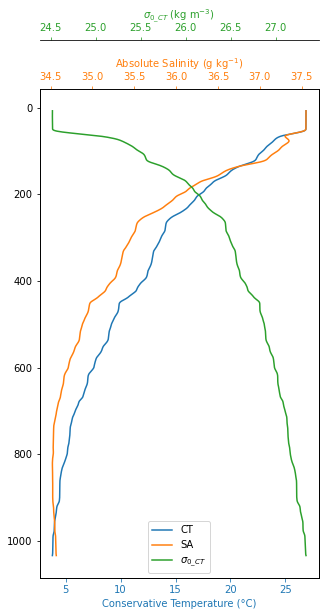

In [133]:
fig, ax0 = plt.subplots(figsize=(5, 9))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
# invertendo orientação do eixo y
ax0.invert_yaxis()
# criando eixos gêmeos para y
ax1 = ax0.twiny()
ax2 = ax0.twiny()
# plotando temperatura
(l0,) = ax0.plot(down_final["CT"], down_final.index, color=colors[0], label="CT")
ax0.set_xlabel("Conservative Temperature (°C)")
# plotando salinidade absoluta
(l1,) = ax1.plot(down_final["SA"], down_final.index, color=colors[1], label="SA")
ax1.set_xlabel("Absolute Salinity (g kg$^{-1}$)")
# plotando densidade
(l2,) = ax2.plot(down_final["sigma0"], down_final.index, color=colors[2], label=r"$\sigma_{0\_CT}$")
ax2.set_xlabel(r"$\sigma_{0\_CT}$ (kg m$^{-3}$)")

ax2.spines["top"].set_position(("axes", 1.1))
ax2.spines["top"].set_visible(True)

ax0.xaxis.label.set_color(l0.get_color())
ax1.xaxis.label.set_color(l1.get_color())
ax2.xaxis.label.set_color(l2.get_color())

ax0.tick_params(axis="x", colors=l0.get_color())
ax1.tick_params(axis="x", colors=l1.get_color())
ax2.tick_params(axis="x", colors=l2.get_color())

lines = ax0.get_lines() + ax1.get_lines() + ax2.get_lines()
leg = {line: line.get_label() for line in lines}

ax0.legend(leg.keys(), leg.values(), loc=8)

ax0.grid(False)
ax1.grid(False)
ax2.grid(False)

plt.savefig('inlec04_verticalprof.png', dpi=150, bbox_to_inches='tight')


Exercício prático - Diagrama TS

Utilizando o conjunto de dados tratado neste encontro, faça:

**Nível 1:**:

- diagrama TS simples utilizando o conjunto de dados da WOA que já temos familiaridade
- customize colocando nome para os eixos x e y, título
- altere as cores e marcadores
- **dica** usaremos um método de visualização ainda não comentado: o ```plt.scatter()```

------

**Nível 2:**

Utilizando o pacote visto hoje (```CTD```), faça: 

- download do conjunto de dados indicado na próxima célula
- leia todos os arquivos cnv (provenientes de amostragens com CTD Seabird)
- explore as colunas e linhas e identifique as variáveis de temperatura e salinidade
- faça visualizações para esta propriedade
- customize utilizando os códigos já desenvolvidos no nível 1

------

**Nível 3:**

Para o mesmo conjunto de dados, vamos adicionar isolinhas de densidade para identificação de massas d'água. Para isso:

- crie matrizes 1D de Temperatura e Salinidade, utilizando o método ```np.linspace()```
- transforme essas matrizes em malhas 2D com o método ```np.meshgrid()```
- compute a densidade com o método ```.sigma0()``` do pacote GSw
- utilize o método ```plt.contour()``` para inserir as isolinhas no gráfico
- neste ponto, tente inserir rótulos dessas isolinhas dentro do próprio gráfico

Em seguida: 

- plote os pontos do diagrama como feito nos níveis 1 e 2
- customize seu diagrama TS

------

**Bônus**:

Tente adicionar as faixas de variações das densidades de massas d'águas. Abaixo deixo uma relação destes valores para facilitar. Utilize o método ```plt.fill_between()``` para isso, explorando seus argumentos para variar cores, por exemplo.

------
**Sugestões**

- deixo abaixo todos os passos já feito de pré processamento em um único bloco de códigos para copiarem e reutilizarem no local que forem resolver o exercício.

------
A esta altura vocês já estão familiarizados com a ferramentas de ajuda do python, então utilize-as:

- ```plt.contour?```
- ```help(plt.scatter)```
- google =]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import ctd
import gsw

# execute a linha de comando abaixo para fazer download do conjunto de dados que serão utilizados
!wget --directory-prefix=../dados/ https://github.com/ocefpaf/pyrantine/raw/master/notebooks/02-CTD/CTD-data/CTD-spiked-unfiltered.cnv.bz2

# lendo um arquivo .cnv, formato vindo do CTD da marca Seabird
cast = ctd.from_cnv('../dados/CTD-spiked-unfiltered.cnv.bz2')

down,up = cast.split()

down_final = down.remove_above_water()\
            .lp_filter()\
            .despike(n1=2, n2=20, block=100)\
            .press_check()\
            .interpolate()\
            .bindata(delta=1)\
            .smooth(window_len=21, window="hanning")

# extraindo metadados
metadados = cast._metadata

# extraindo pressao que é um índice
pressao = down_final.index

lon,lat = metadados['lon'], metadados['lat']


# Salinidade Prática
SP = gsw.SP_from_C(down_final['c0S/m']*10, 
                   down_final['t090C'], 
                   pressao)

# Salinidade Absoluta
SA = gsw.SA_from_SP(SP, pressao, lon, lat)

# Temperatura conservativa
CT = gsw.CT_from_t(SA, 
                   down_final['t090C'].values,
                   pressao)

# Profundidade a partir da pressão
z = -gsw.z_from_p(pressao, lat)

# Anomalia da densidade potensial
sigma0 = gsw.sigma0(SA, CT)

down_final = down_final.assign(SP=SP, 
                               SA=SA, 
                               CT=CT,
                               z=z,
                               sigma0=sigma0)

# ---- continuem a partir daqui ----- #